In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('/Users/takayuki_kumakura/Downloads/train.csv')
test = pd.read_csv('/Users/takayuki_kumakura/Downloads/test.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_shape = train.shape
test_shape = test.shape

print(train_shape)
print(test_shape)

(891, 12)
(418, 11)


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
def deficit(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    deficit = pd.concat([null_val,percent],axis=1)
    deficit_columns = deficit.rename(columns={0:'欠損値',1:'%'})
    return deficit_columns

deficit(train)

,欠損値,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [9]:
deficit(test)

,欠損値,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [10]:
#Ageの欠損値を平均値で補完する
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna('S')
deficit(train)

,欠損値,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [11]:
#testも同様の処理
test['Age'] = test['Age'].fillna(test["Age"].mean())

#testはFareの欠損値が１つあるので平均値で欠損値をなくす
test.Fare[152] = test.Fare.mean()

deficit(test)

/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,欠損値,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,327,78.229665


In [12]:
#SexとEmbarkedを数値に変換
train['Sex'] = train['Sex'].map({'male':0,'female':1})
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})

In [13]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [14]:
#testも同様の処理を行う。
test['Sex'] = test['Sex'].map({'male':0,'female':1})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2})



In [15]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


([array([468.,   0.,  81.]), array([109.,   0., 233.])],
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 2 Lists of Patches objects>)

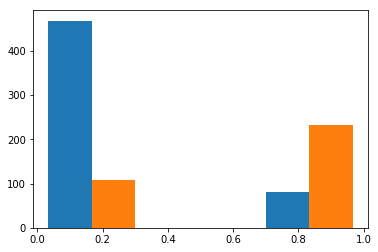

In [16]:
#男女別で生死の数に差があるか確認
split_data = []
for survived in [0,1]:
    split_data.append(train[train.Survived==survived])

temp = [i['Sex'].dropna() for i in split_data]
plt.hist(temp,histtype='bar',bins=3)
# blue：male / orange：female 左側が死亡、右側が生存

([array([ 13.,  16.,  16.,  72.,  72., 199.,  44.,  35.,  33.,  15.,  13.,
          11.,   4.,   6.,   0.]),
  array([ 44.,  24.,  32., 104., 115., 304.,  80.,  59.,  49.,  30.,  22.,
          17.,   4.,   6.,   1.])],
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <a list of 2 Lists of Patches objects>)

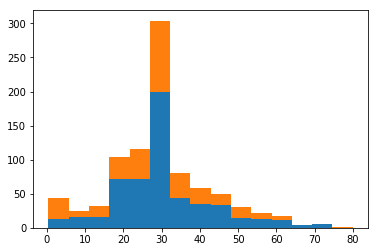

In [17]:
#続いて年齢が生死に影響しているのかを確認
temp = [i['Age'].dropna() for i in split_data]
plt.hist(temp,histtype='barstacked',bins=15)

([array([ 80.,   0.,  97.,   0., 372.]),
  array([216.,   0., 184.,   0., 491.])],
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <a list of 2 Lists of Patches objects>)

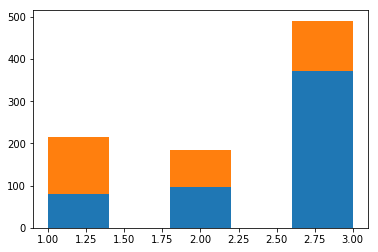

In [18]:
temp = [i['Pclass'].dropna() for i in split_data]
plt.hist(temp,histtype='barstacked',bins=5)
#左側が高価なチケット　------＞安い　

In [19]:
#ここから予測していく
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split

/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takayuki_kumakura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/cross_v

In [20]:
target = train['Survived'].values
features = train[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']]

first_tree = tree.DecisionTreeClassifier()
first_tree = first_tree.fit(features,target)

test_features = test[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']].values

first_predict = first_tree.predict(test_features)

In [21]:
first_predict.shape

(418,)

In [22]:
print(first_predict)

[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 1]


In [23]:
PassengerId = np.array(test['PassengerId']).astype(int)

solution = pd.DataFrame(first_predict,PassengerId,columns=['Survived'])

solution.to_csv('first_tree.csv',index_label = ['PassengerId'])
#結果は70.8％でした

In [24]:
#RandomForestを試してみる

forest = RandomForestClassifier(n_estimators = 10,
                               criterion = 'gini',
                               max_depth = 5,
                               min_samples_split = 10,
                               min_samples_leaf = 5,
                               random_state = 0)

forest = forest.fit(features,target)
test_features_s = test[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']].values

second_predict = forest.predict(test_features_s)

In [25]:
second_predict.shape

(418,)

In [26]:
print(second_predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [27]:
PassengerId = np.array(test['PassengerId']).astype(int)

solution_s = pd.DataFrame(second_predict,PassengerId,columns=['Survived'])

solution_s.to_csv('forest.csv',index_label = ['PassengerId'])
#結果は77.0％でした

In [28]:
#最後にGridSearchで最適なパラメータを探ってみる。
param_grid = {
    'n_estimators' : [5,10,20,30,40,50,100],
    'criterion' : ['gini','entropy'],
    'min_samples_split' : [3,5,10,15,20,25,30,40,50],
    'max_depth' : [3,5,10,15,20,25,30,40,50]
}

clf = GridSearchCV(RandomForestClassifier(),param_grid)
clf.fit(features,target)
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [29]:
forest = RandomForestClassifier(n_estimators = 10,
                               criterion = 'entropy',
                               max_depth = 15,
                               min_samples_split = 15,
                               min_samples_leaf = 1,
                               random_state = 0)

forest = forest.fit(features,target)
test_features_t = test[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']].values

third_predict = forest.predict(test_features_t)

In [30]:
third_predict.shape

(418,)

In [31]:
print(third_predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [32]:
PassengerId = np.array(test['PassengerId']).astype(int)

solution_t = pd.DataFrame(third_predict,PassengerId,columns=['Survived'])

solution_t.to_csv('forest3.csv',index_label = ['PassengerId'])
#結果は76.5％でした